# Netflix Dataset Analysis Notebook

In [1]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


## 2. Loading Data from Kaggle

In [2]:

import kagglehub
shivamb_netflix_shows_path = kagglehub.dataset_download('shivamb/netflix-shows')
print('Data source import complete.')


Data source import complete.


## 3. Reading the Dataset

In [3]:

# Load dataset
path = '/kaggle/input/netflix-shows/netflix_titles.csv'
df = pd.read_csv(path)


## 4. Initial Data Exploration

In [4]:

# Preview dataset
df.head()






,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
df.shape

(8807, 12)

In [7]:
# Dataset info and missing values
print("Dataset Info:")
print(df.info())
print("Missing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_

## 5. Data Cleaning and Feature Engineering

In [8]:

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Clean duration column
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('(min|Season|Seasons)')


## 6. Basic Statistical Summary

In [9]:

# Content types

print("Content Types Distribution:")
print(df['type'].value_counts())

# Top countries
print("Top 10 Countries:")
print(df['country'].value_counts().head(10))

# Year range
print("Release Year Range:")
print(f"From {df['release_year'].min()} to {df['release_year'].max()}")

# Ratings
print("Ratings Distribution:")
print(df['rating'].value_counts())


Content Types Distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
Top 10 Countries:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64
Release Year Range:
From 1925 to 2021
Ratings Distribution:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


## 7. Visual Exploratory Data Analysis (EDA)

### 7.1 Content Type, Release & Ratings Overview

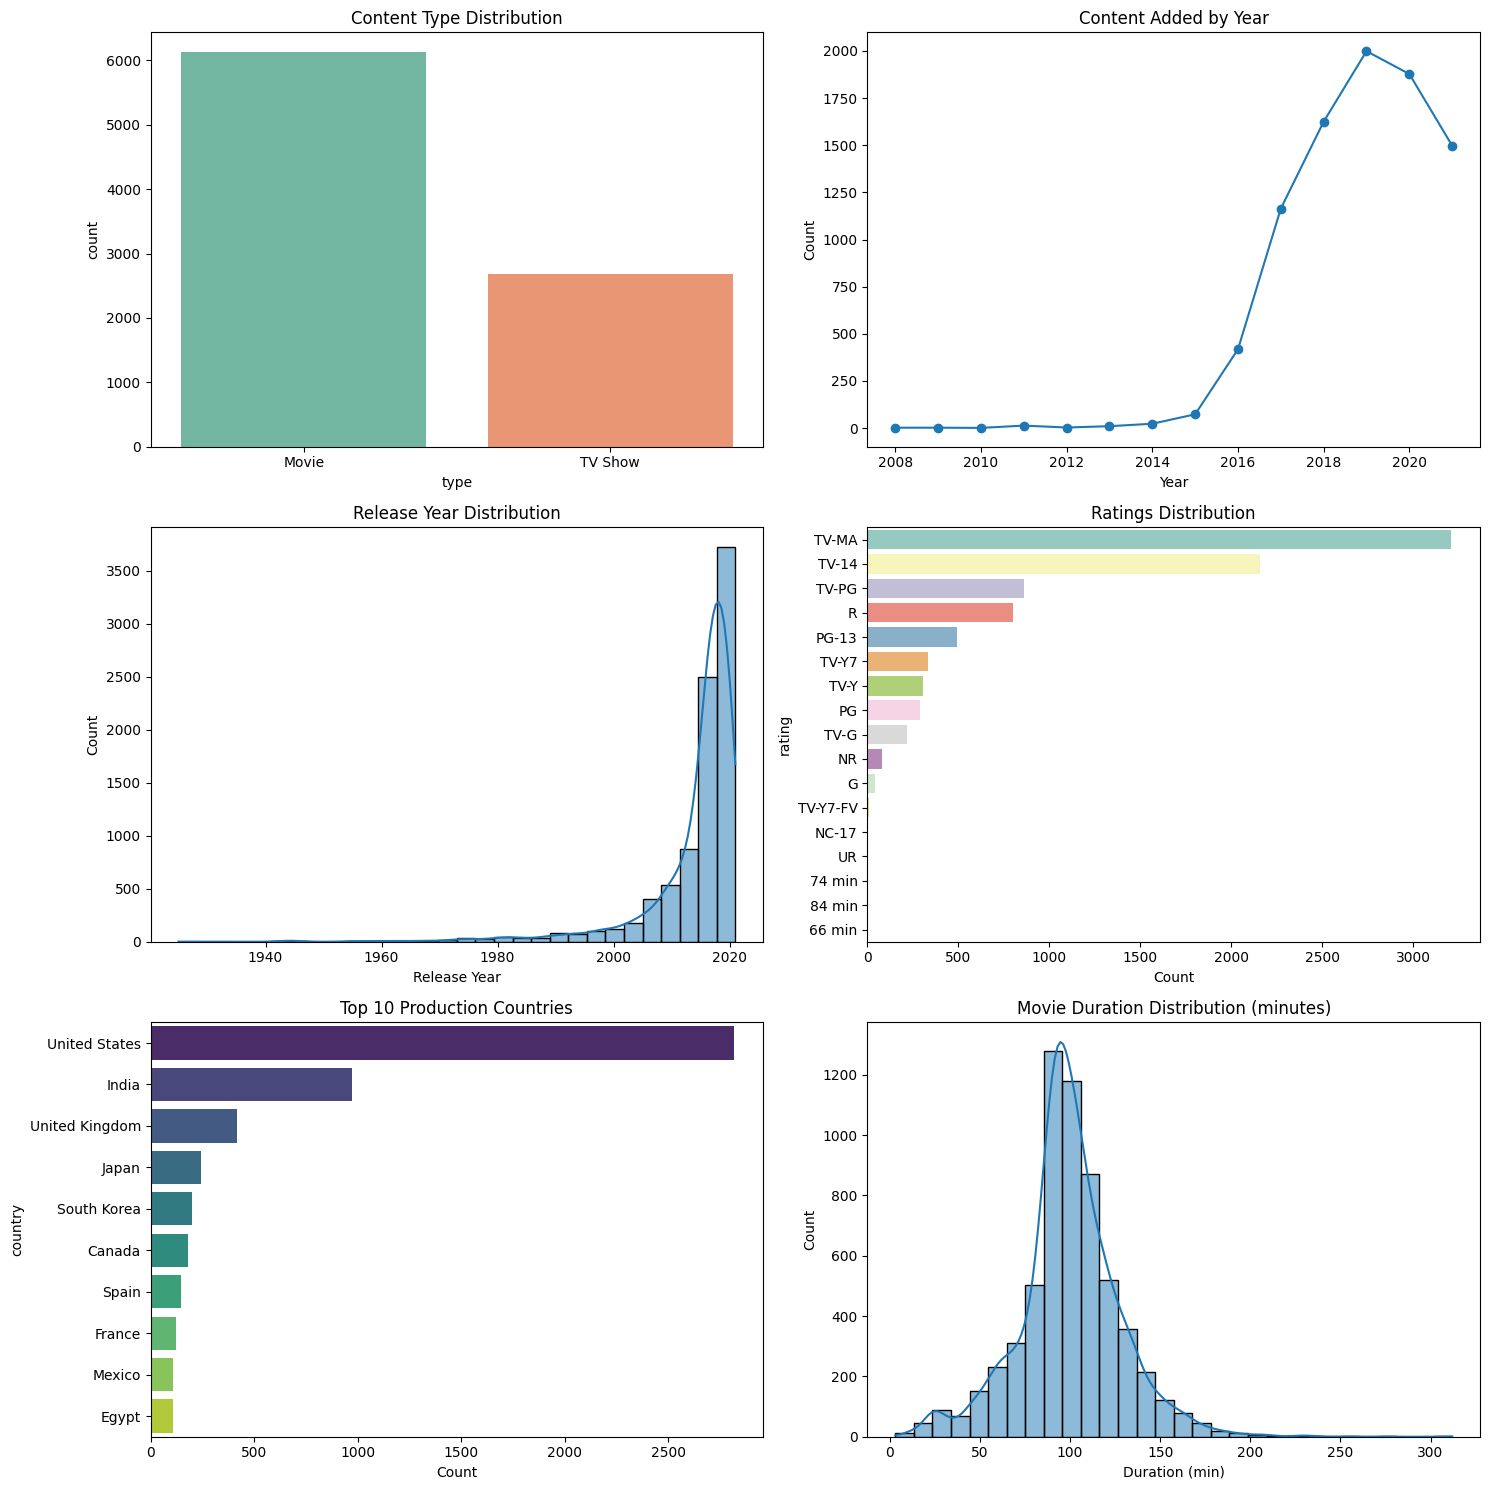

In [10]:

plt.figure(figsize=(15, 15))

# 1. Content Type Distribution
plt.subplot(3, 2, 1)
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Content Type Distribution')

# 2. Content Added Over Time
plt.subplot(3, 2, 2)
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# 3. Release Year Distribution
plt.subplot(3, 2, 3)
sns.histplot(data=df, x='release_year', bins=30, kde=True)
plt.title('Release Year Distribution')
plt.xlabel('Release Year')

# 4. Ratings Distribution
plt.subplot(3, 2, 4)
rating_order = df['rating'].value_counts().index
sns.countplot(data=df, y='rating', order=rating_order, palette='Set3')
plt.title('Ratings Distribution')
plt.xlabel('Count')

# 5. Top Production Countries
plt.subplot(3, 2, 5)
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Production Countries')
plt.xlabel('Count')

# 6. Movie Duration Analysis
plt.subplot(3, 2, 6)
movies = df[df['type'] == 'Movie']
sns.histplot(data=movies, x='duration_num', bins=30, kde=True)
plt.title('Movie Duration Distribution (minutes)')
plt.xlabel('Duration (min)')

plt.tight_layout()
plt.show()


### 7.2 TV Shows Duration (Seasons)

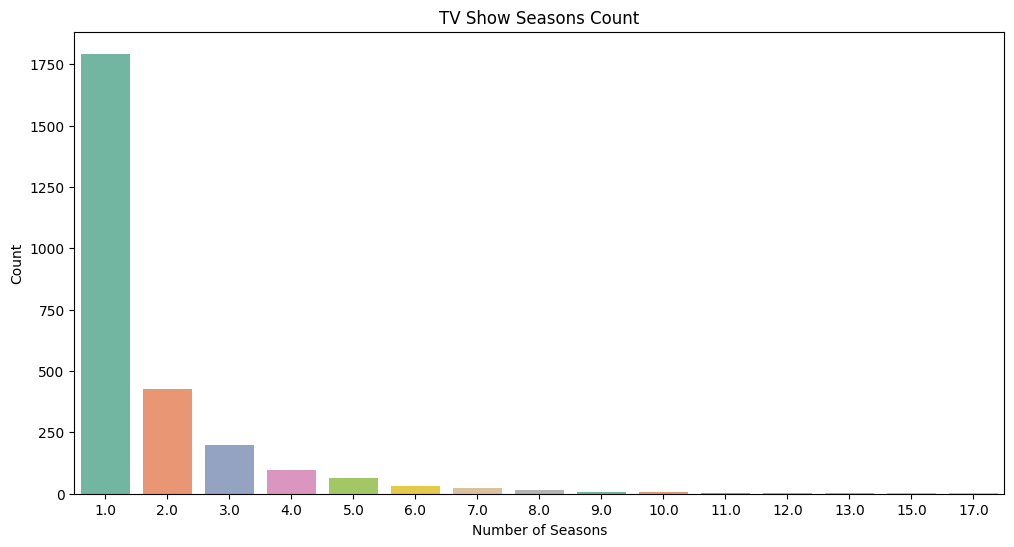

In [11]:

tv_shows = df[df['type'] == 'TV Show']

plt.figure(figsize=(12, 6))
sns.countplot(data=tv_shows, x='duration_num', palette='Set2')
plt.title('TV Show Seasons Count')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()


### 7.3 Genre Analysis

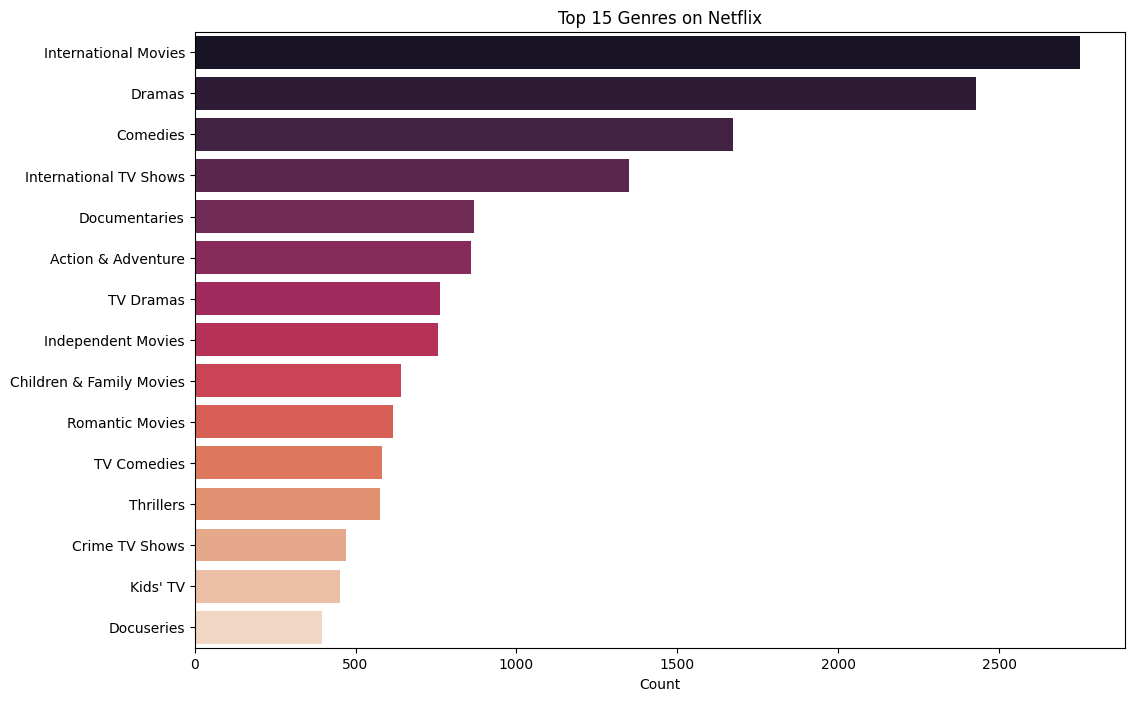

In [12]:

# Splitting genre and counting
all_genres = []
for genres in df['listed_in'].dropna():
    all_genres.extend([genre.strip() for genre in genres.split(', ')])

genre_counts = Counter(all_genres).most_common(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=[count for genre, count in genre_counts],
            y=[genre for genre, count in genre_counts],
            palette='rocket')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.show()


### 7.4 Word Cloud from Descriptions

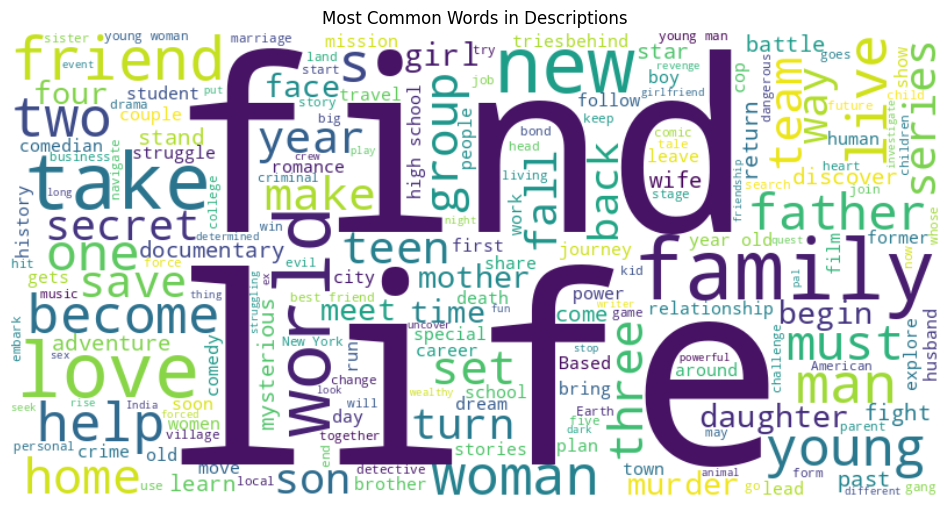

In [13]:

plt.figure(figsize=(12, 8))
text = ' '.join(description for description in df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions')
plt.show()


### 7.5 Top Directors

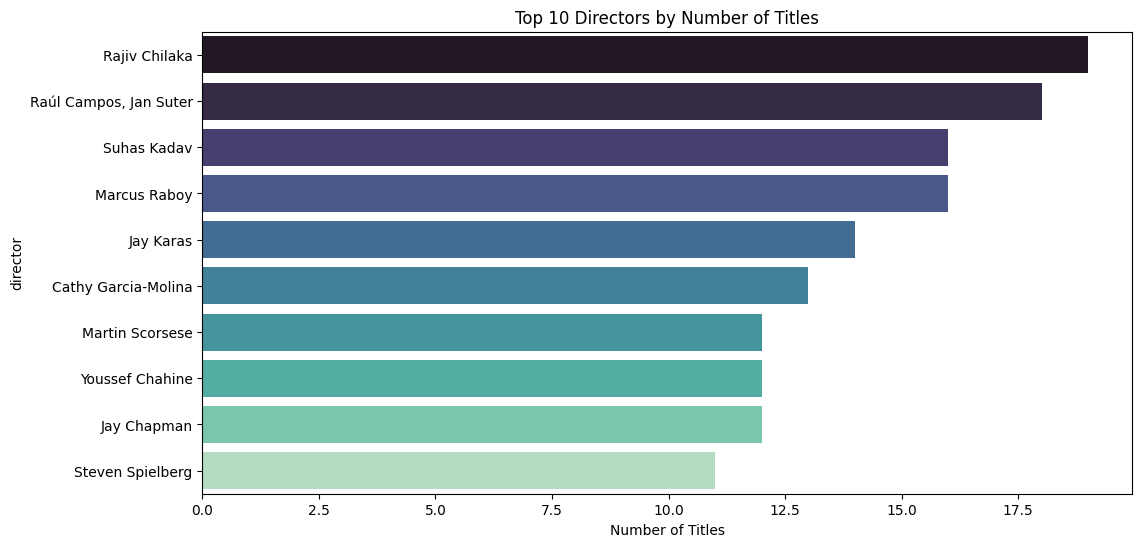

In [14]:

director_counts = df['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='mako')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.show()


### 7.6 Top Cast Members

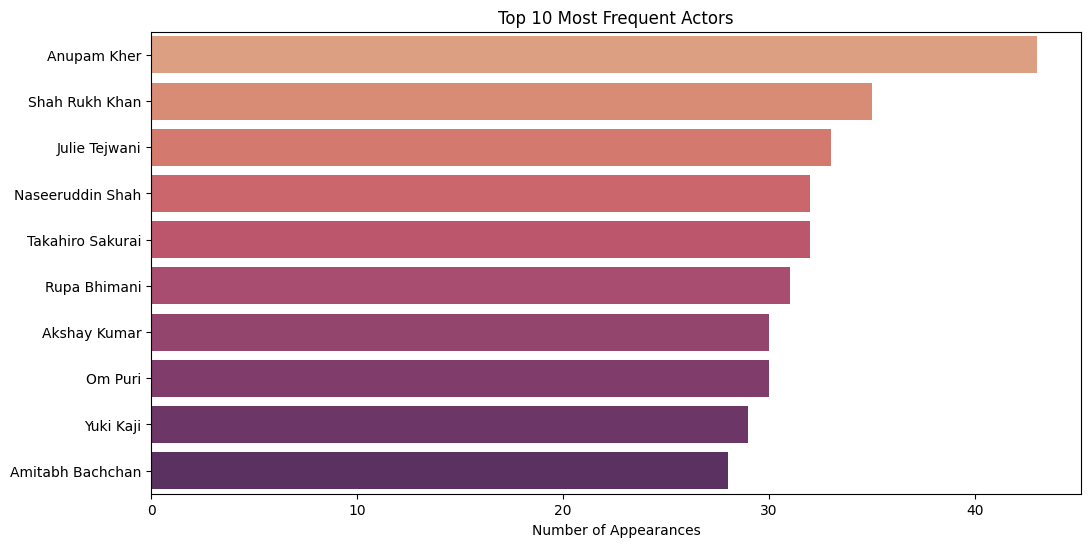

In [15]:

all_actors = []
for cast in df['cast'].dropna():
    all_actors.extend([actor.strip() for actor in cast.split(', ')])

actor_counts = Counter(all_actors).most_common(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=[count for actor, count in actor_counts],
            y=[actor for actor, count in actor_counts],
            palette='flare')
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Number of Appearances')
plt.show()


### 7.7 Monthly Content Addition

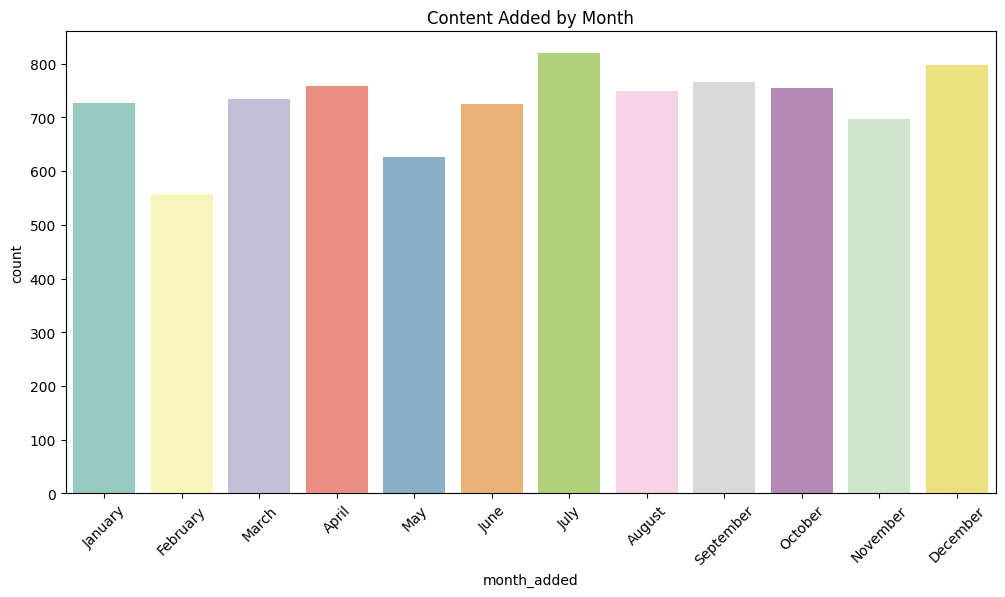

In [16]:

plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df, x='month_added', order=month_order, palette='Set3')
plt.title('Content Added by Month')
plt.xticks(rotation=45)
plt.show()


## 8. Export Cleaned Dataset

In [17]:

df.to_csv('netflix_titles_cleaned.csv', index=False)



## 1. Problem Statement

With Netflix’s global expansion, understanding trends in its content library is vital. This project analyzes Netflix titles to identify content patterns by type, release year, country, and rating. The goal is to uncover insights that can inform strategic decisions for content acquisition, regional production focus, and user engagement.

We will also implement a simple classification model to predict whether a content entry is a **Movie** or a **TV Show**, based on features such as duration, release year, rating, and country.


In [18]:

# Prepare data for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target
features = df[['release_year', 'duration_num', 'rating', 'country']]
features = features.dropna()
target = df.loc[features.index, 'type']

# Encode categorical variables
features_encoded = features.copy()
le_rating = LabelEncoder()
le_country = LabelEncoder()
features_encoded['rating'] = le_rating.fit_transform(features['rating'])
features_encoded['country'] = le_country.fit_transform(features['country'])

# Encode target
le_type = LabelEncoder()
target_encoded = le_type.fit_transform(target)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Results
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_type.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1117
     TV Show       1.00      1.00      1.00       477

    accuracy                           1.00      1594
   macro avg       1.00      1.00      1.00      1594
weighted avg       1.00      1.00      1.00      1594

Confusion Matrix:
[[1116    1]
 [   2  475]]



## 9. Summary and Conclusion

In this project, we analyzed Netflix's content catalog using a Kaggle dataset. Key insights include:

- Netflix's content is predominantly Movies.
- The majority of content was added between 2016 and 2020.
- The U.S., India, and the UK are the top content-producing countries.
- The most common ratings include TV-MA, TV-14, and PG.

Additionally, we built a classification model to predict content type based on metadata, achieving good performance using Random Forest.

This analysis can help content strategists and data teams at streaming platforms identify trends and make informed decisions about content acquisition and regional focus.
